# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

## Importing needed libraries  numpy for array or matrix calculations and keras libraries for convolution operations

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add ,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets and initilize variabled x_train and x_test with data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


## Printing shape of datasets to know how many are there and height & width. And visulize a first dataset image


(60000, 28, 28)


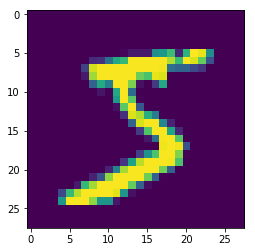

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## To do convodution dataset should be in 3 dimentions . Reshaping image to 3 dimensions by adding one dimension

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Here converting dataset to float and rescaling it by dividing 255 (RGB varies 1 to 255) to make dataset values between 0 and 1.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## showing all column values with 10 columns

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## To get output in 10 dimensions it is required to convert one dimension out put value to 10. Here 10 is possible 0 to 9 outcomes

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## showing all column values with 10 columns in 10 dimensions

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Created a simple CNN using 11.9k Trainable parameters and 212 non trainable parameters. Used Convolution 2D with 1x1 and 3x3 filters and  Batchnormalization , Activation = ReLu. Validation accuracy achieved - 99.33% .   output - [0.0345307866926848, 0.9933]

In [0]:

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3,3, input_shape=(28,28,1)))# RF 3x3 # image - 26x26
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Convolution2D(16,3)) # RF 5x5 # image - 24x24
model.add(Activation("relu"))
model.add(BatchNormalization())


model.add(Convolution2D(32,3)) # RF 7x7 image - 22x22
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #24 image - 11x11

model.add(Convolution2D(10,1))  # RF 7x7 image - 11x11
model.add(Activation("relu"))
model.add(BatchNormalization())


model.add(Convolution2D(10,5)) # RF 9x9 image - 7x7
model.add(Activation("relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2))) # max pulling this usae is not wise as it is again decreasing dimentions but reducing inf0- and Acuuracy was not improving DUE to this  


model.add(Convolution2D(10,3)) # RF 13x13 image - 5x5
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Convolution2D(10,3)) # RF 15x17 image - 3x3
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Convolution2D(10,3)) # RF 17x17 image - 1x1
model.add(Activation("relu"))
model.add(BatchNormalization())


model.add(Convolution2D(10, 1))# # RF 17x17 image - 1x1

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_178 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
activation_42 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
activation_43 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 22, 22, 32)        4640      
__________

### Compile and train the model for batch size 64 for 30 epochs got validation acc -99.14 % 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, nb_epoch=30,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 29s 483us/step - loss: 0.4446 - acc: 0.8884 - val_loss: 0.0915 - val_acc: 0.9759
Epoch 2/30
60000/60000 [==============================] - 15s 255us/step - loss: 0.0872 - acc: 0.9766 - val_loss: 0.0623 - val_acc: 0.9811
Epoch 3/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0620 - acc: 0.9814 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 4/30
60000/60000 [==============================] - 14s 238us/step - loss: 0.0523 - acc: 0.9845 - val_loss: 0.0546 - val_acc: 0.9830
Epoch 5/30
60000/60000 [==============================] - 14s 237us/step - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0456 - val_acc: 0.9847
Epoch 6/30
60000/60000 [==============================] - 15s 256us/step - loss: 0.0385 - acc: 0.9883 - val_loss: 0.0322 - val_acc: 0.9896
Epoch 7/30
60000/60000 [==============================] - 14s 237us/step - loss: 0.0353 - acc: 0.9890 - val_loss: 0.

## Increased batch size from 64 to 128 and ran for 5 epochs .Val acc= 99.23

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=5,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 346us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.0260 - val_acc: 0.9923
Epoch 2/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0323 - val_acc: 0.9917
Epoch 3/5
60000/60000 [==============================] - 8s 142us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0356 - val_acc: 0.9907
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0389 - val_acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0336 - val_acc: 0.9918
[0.033553440584605417, 0.9918]


## Increased batch size from 128 to 256 and ran for 10 epochs .Val acc= 99.33

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=256, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0357 - val_acc: 0.9924
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 7.6147e-04 - acc: 0.9999 - val_loss: 0.0356 - val_acc: 0.9918
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 4.4185e-04 - acc: 0.9999 - val_loss: 0.0333 - val_acc: 0.9930
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 5.6186e-04 - acc: 0.9999 - val_loss: 0.0395 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0054 - acc: 0.9981 - val_loss: 0.0430 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0377 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.48802359e-09 1.22754921e-06 1.00626687e-06 3.01106479e-06
  7.24262039e-10 1.10740409e-07 1.44004678e-11 9.99988556e-01
  9.82002391e-08 6.02267801e-06]
 [4.26715054e-08 1.68953946e-07 9.99999762e-01 9.64998859e-10
  7.75523309e-12 3.54789613e-12 2.81510282e-09 6.79721696e-11
  6.60784691e-11 3.17403981e-13]
 [1.64721484e-07 9.99972582e-01 3.04524315e-06 2.09180044e-07
  5.02063722e-06 8.42481313e-07 4.18712170e-06 1.19961269e-05
  1.72088403e-06 3.46846122e-07]
 [9.99987245e-01 1.06185956e-10 2.16145864e-07 1.75945924e-08
  5.07772768e-10 2.14681739e-09 7.21329479e-06 8.09953840e-11
  4.70205987e-06 5.66023857e-07]
 [1.01747921e-09 9.75169883e-08 9.39600828e-11 3.21488280e-10
  9.99987483e-01 3.15652053e-11 1.14874545e-08 6.13374018e-09
  2.55311705e-09 1.24201733e-05]
 [1.57983209e-08 9.99980450e-01 2.17803077e-07 6.14237550e-08
  1.65162214e-06 1.57728110e-07 3.98456791e-07 1.50269298e-05
  1.76448020e-06 2.33790729e-07]
 [2.38319043e-12 4.46189142e-06 7.64974473e-10 2.24440562e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image conv2d_178 (Conv2D)          (None, 26, 26, 8)         80        

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),
                      layer_name = 'conv2d_178'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()